<a href="https://colab.research.google.com/github/git-siddhesh/MachineLearning_ES654_2022/blob/main/Prerequisite_Test_siddhesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

> The number of multiplications required to multiple `(n,k)x(k,m)` matrices are `n*k*m`

> The number of additions required are 

Let C = A x B 
where, A(n,k) and B(k,m)

> The basic rule to multiply two matrices is that the number of columns in first and number of rows in second matrix should be the same. 

(WhY?)

> In mat. multi., there is the dot product between each row of first matrix and each column of second matrix.

(HoW?)

>`THE DOT PRODUCT`: Each element of the row of A is muliplied with respective element at the index of the column of B. 
And the sum of all the operations is defined as the final value at the index of row and columns of that matrices.

And that is why the number of element in the row of A (i.e., number of columns) should be equal to the element in the column of B (i.e., number of rows)

**At the total, there are nxkxm multiplications** 


> There are `n*(k-1)*m` additions required.

Since a dot product between a row of first and column of second required k operations.

And the final value is the sum of all this k intermediate results, that is `k-1` additions.

> Since, there are n rows in first matrix and m columns in second matrix, hence total number of additions are `nx(k-1)xm`.

# Question 2

**Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?**

In [35]:
matrix1 = [ [1,2],
            [2,1],
            [2,2]
          ]

matrix2 = [
              [1,2,1],
              [2,1,2]
          ]

matrix3 = [[0]*len(matrix1) for _ in range(len(matrix2[0]))]

for i in range(len(matrix1)):
  for j in range(len(matrix2[0])):
    for k in range(len(matrix2)):
      matrix3[i][j] += (matrix1[i][k] * matrix2[k][j])
    
print(matrix3)

[[5, 4, 5], [4, 5, 4], [6, 6, 6]]


## Matrix Multiplication

In [36]:
def matrix_multiplication_using_list(matrix1, matrix2):
  matrix3 = [[0]*len(matrix2[0]) for _ in range(len(matrix1))]
  # print(matrix3)
  for i in range(len(matrix1)):
    for j in range(len(matrix2[0])):
      for k in range(len(matrix2)):
        matrix3[i][j] += (matrix1[i][k] * matrix2[k][j])
      
  # print(matrix3)

In [37]:
import random

a,b,c = random.randint(5,10), random.randint(5,10), random.randint(5,10) 

matrix1 = [[random.randint(-50, 50) for i in range(b)] for j in range(a) ]
matrix2 = [[random.randint(-50, 50) for i in range(c)] for j in range(b) ]

print(matrix1)
print(matrix2)


[[49, 45, 43, -25, -48, 20, 33, -28, 19, 46], [48, 17, 45, -1, 47, 7, 25, -18, -22, -20], [-17, 37, 9, -11, 32, 36, -50, -6, 3, 33], [-49, -22, 34, 26, -20, -24, 22, 33, 33, -22], [45, 13, 25, 46, -5, 30, 19, 22, 35, 8], [29, -37, -23, -4, -26, 31, -40, 28, 15, 4], [25, -43, 29, 42, -22, 18, 1, 36, 0, 38], [28, 34, 29, -12, 32, 23, -3, 38, 47, -7], [5, -19, 48, -33, -12, 10, -29, 42, 15, 49], [32, -50, 17, 1, -45, -7, 1, -32, -13, -32]]
[[39, 41, 26, 25, -13, -13, 37], [-43, -3, -50, 35, -28, -39, -3], [-49, 18, 19, -11, 28, -49, 50], [-4, 45, -46, 41, 33, -12, -31], [-9, 31, -4, -19, 35, 28, 3], [-27, -35, -21, 29, 5, -15, 8], [-9, -1, 29, 33, -13, -20, 32], [39, 30, 46, 21, -15, 15, 20], [-50, 0, -3, -37, 23, -20, 15], [12, -46, -42, 8, 42, 39, 14]]


In [38]:
%timeit matrix_multiplication_using_list(matrix1, matrix2)

221 µs ± 2.89 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Using numpy 


but first, let us go to this documentation on numpy

> `numpy.dot` 
numpy.dot(a, b, out=None)  
Dot product of two arrays. Specifically,

1. If both a and b are 1-D arrays, it is inner product of vectors (without complex conjugation).

2. If both a and b are 2-D arrays, it is matrix multiplication, but using `matmul` or a @ b is preferred.

3. If either a or b is 0-D (scalar), it is equivalent to multiply and using `numpy.multiply(a, b)` or a * b is preferred.


In [39]:
import numpy as np

In [40]:
%timeit np.matmul(matrix1, matrix2)

27.7 µs ± 856 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Let's try with some larger dimensions 



In [ ]:
# a,b,c = random.randint(20,100), random.randint(20,100), random.randint(20,100) 
a,b,c = 512, 512, 512
matrix1 = [[random.randint(-50, 50) for i in range(b)] for j in range(a) ]
matrix2 = [[random.randint(-50, 50) for i in range(c)] for j in range(b) ]

List multiplication

In [ ]:
%timeit matrix_multiplication_using_list(matrix1, matrix2)

41.2 s ± 212 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Numpy multiplication

In [ ]:
%timeit np.matmul(matrix1, matrix2)

575 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


* A numpy array is a group of homogeneous data types that are closely arranged in memory. whereas list are of heterogeneous data types which imposes a lot more restrictions when doing computations on it. 
* Adding to this, python lists are the collection of the object of respective classes like int, float, string, etc where as numpy arrays are the collection of basic data types and not the objects.
* The concurrent processing of many subtasks is possible with Numpy, since
Functions from Numpy are implemented in C.

## PLOTS 

Text(0.5, 1.0, 'LIST')

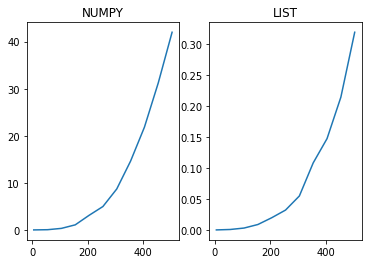

In [47]:
time_list = []
time_np = []
size = []

import time
for n in range(5,512,50):
  matrix1 = [[random.randint(-50, 50) for i in range(n)] for j in range(n) ]
  matrix2 = [[random.randint(-50, 50) for i in range(n)] for j in range(n) ]
  size.append(n)
  matrix11 = np.array(matrix1)
  matrix22 = np.array(matrix2)
  t1 = time.time()
  np.matmul(matrix11, matrix22)
  time_list.append(time.time()-t1)
  t2 = time.time()
  matrix_multiplication_using_list(matrix1, matrix2)
  time_np.append(time.time()-t2)


import matplotlib.pyplot as plt

plt.subplot(1,2,1)
plt.plot(size, time_np)
plt.title("NUMPY")

plt.subplot(1,2,2)
plt.plot(size, time_list)
plt.title("LIST")




In the above two figs you can find the drastic difference between the values of Y-axis

In [48]:
print(size)
print(time_np)
print(time_list)

[5, 55, 105, 155, 205, 255, 305, 355, 405, 455, 505]
[7.987022399902344e-05, 0.04610252380371094, 0.32629847526550293, 1.0775647163391113, 3.1008901596069336, 4.9710657596588135, 8.699593305587769, 14.624361038208008, 21.8241126537323, 31.230121850967407, 41.99957609176636]
[0.0001010894775390625, 0.0007987022399902344, 0.003110647201538086, 0.008828163146972656, 0.01976776123046875, 0.03216290473937988, 0.05495023727416992, 0.10842537879943848, 0.14763760566711426, 0.21464037895202637, 0.319533109664917]


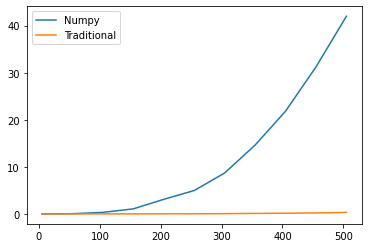

In [52]:
# plot lines
plt.plot(size, time_np, label = "Numpy")
plt.plot(size, time_list, label = "Traditional")
plt.legend()
plt.show()

# Question 3

Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

## Solution

The given method is somewhat like the `selection sort` but limited to the `n/2` traversals.

Since in the `Selection sort`, in each iteration we find the min element out of the `remaining unsorted elements` and push it into the `sorted part` of the array.

Below is the code for the same.

In [59]:
array = [random.randint(-50, 50) for _ in range(random.randint(20, 100))]

print(array)

[3, 31, -17, 23, 39, -6, -29, 18, -42, -26, 25, 23, 23, -9, -43, -7, -6, -38, 15, -34, -19, -37, -35, -18, 15, -35, 42, -24, -44, 14, 50, 1, 20, -36, 39, -32, -34, 37, 2, -40, 35, -14, 33, 4, 15, 13, -15, -48, 8, 9, 49, -14, -50, -41, -26, -4, -49, 3, 23, -43, -24, 43, 46, 44, 29, -37, 5, 18, 31, 27, -9, 23, -6, 36, -17, -46, 33, -4, 21, 45, 25, -46, -44, -41, -9, -10, -47, 30, 8, 24, 17]


In [60]:
def median_using_multiple_iterations(array):
  for i in range(len(array)//2 + 1):
    current_index = i
    for j in range(i+1,len(array)):
      if  array[current_index] < array[j] :
        current_index = j
    array[current_index], array[i] = array[i], array[current_index]

  median = array[len(array)//2]
  if len(array)%2 == 0:
    median += array[len(array)//2 -1]
    median/=2
  
  return median


In [61]:
median_using_multiple_iterations(array)


1

## The optimized method to find the median in linear time: `MEDIAN of MEDIANS`

> This algorithm tries to find the median in O(n) time but with very high contant time.

This method is generally not prefered due to its high contant calcuations.

> Here in the algorithm, we have used the `median window size = 5` (which is considered as the best window size from the pool of {3,5,7,9,..})

In [62]:
def median_of_medians(arr):
    """
    Median of medians is an algorithm to select an approximate median as a pivot for a partitioning algorithm.
    :param arr:
    :return:
    """
    if arr is None or len(arr) == 0:
        return None

    return select_pivot(arr, len(arr) // 2)


def select_pivot(arr, k):
    """
    Select a pivot corresponding to the kth largest element in the array
    :param arr: Array from which we need to find the median.
    :param k: cardinality that represents the kth larget element in the array
    :return: The value of the pivot
    """
    # Divide array into chunks of 5
    #chunks by taking i from 0 to 4, 5 to 9, 10 to 14, etc
    chunks = [arr[i : i+5] for i in range(0, len(arr), 5)]

    #sort each chunks
    sorted_chunks = [sorted(chunk) for chunk in chunks]


    #take the median of each chunk
    medians = [chunk[len(chunk) // 2] for chunk in sorted_chunks]

    #find the median of medians
    if len(medians) <= 5:
        pivot = sorted(medians)[len(medians) // 2]
    else:
        pivot = select_pivot(medians, len(medians) // 2)



    #partition the array around the pivot
    p = partition(arr, pivot)

    #is the pivot position at the k position?
    if k == p:
        #select that pivot
        return pivot

    if k < p:
        #select a new pivot by looking on the left side of the partioning
        return select_pivot(arr[0:p], k)
    else:
        #select a new pivot by looking on the right side of the partioning
        return select_pivot(arr[p+1:len(arr)], k - p - 1)


def partition(arr, pivot):
    """
    Partition the array around the given pivot
    :param arr: array to be partitioned
    :param pivot: pivot used for the partitioning
    :return: final position of the pivot used as a partioning point
    """
    left = 0
    right = len(arr) - 1
    i = 0

    while i <= right:
        if arr[i] == pivot:
            i += 1

        elif arr[i] < pivot:
            arr[left], arr[i] = arr[i], arr[left]
            left += 1
            i += 1
        else:
            arr[right], arr[i] = arr[i], arr[right]
            right -= 1

    return left

# arr = [1, 2, 3, 4, 5, 1000, 8, 9, 99]




reference of the code used : https://gist.github.com/boulethao/a15809963d326a5ad43f255fbffbf9ff

In [63]:
def median_using_mom(array):
  pivot1 = median_of_medians(array)
  if len(array)%2 == 0:
    pivot2 = median_of_medians(array[:-1])
    pivot1 += pivot2
    pivot1/=2

  return (pivot1) 

  

In [64]:
median_using_mom(array)

1

## Using numpy


In [65]:
array_np = np.array(array)

print(np.median(array))

1.0


## let's compare the time consumption by each:

In [66]:
%timeit median_using_multiple_iterations(array)

263 µs ± 16 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [67]:
%timeit median_using_mom(array)

127 µs ± 1.53 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [68]:
%timeit np.median(np.array(array))

30 µs ± 1.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Compare with a large size of input data

In [69]:
array = [random.randint(-50, 50) for _ in range(1000)]


In [70]:
%timeit median_using_multiple_iterations(array)

34 ms ± 1.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [71]:
%timeit median_using_mom(array)

2.79 ms ± 73.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [72]:
%timeit np.median(np.array(array))

100 µs ± 1.67 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## PLOTS

Text(0.5, 1.0, 'LIST')

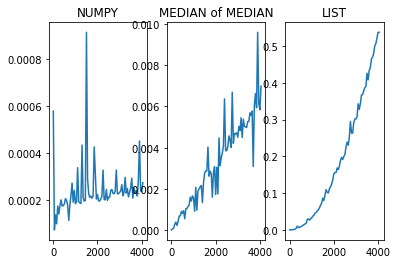

In [84]:


time_list = []
time_mom = []
time_np = []
size = []

import time
for n in range(5,4096,50):
  array = [random.randint(-100, 100) for _ in range(n)]
  array2 = np.array(array)
  size.append(n)

  t1 = time.time()
  median_using_multiple_iterations(array)
  time_list.append(time.time()-t1)

  t2 = time.time()
  median_using_mom(array)
  time_mom.append(time.time()-t2)

  t3 = time.time()
  np.median(array2)
  time_np.append(time.time()-t3)

plt.subplot(1,3,1)
plt.plot(size, time_np)
plt.title("NUMPY")

plt.subplot(1,3,2)
plt.plot(size, time_mom)
plt.title("MEDIAN of MEDIAN")


plt.subplot(1,3,3)
plt.plot(size, time_list)
plt.title("LIST")



> Note: that at worst case even numpy can fail

In [85]:
print(size)
print(time_np)
print(time_mom)
print(time_list)

[5, 55, 105, 155, 205, 255, 305, 355, 405, 455, 505, 555, 605, 655, 705, 755, 805, 855, 905, 955, 1005, 1055, 1105, 1155, 1205, 1255, 1305, 1355, 1405, 1455, 1505, 1555, 1605, 1655, 1705, 1755, 1805, 1855, 1905, 1955, 2005, 2055, 2105, 2155, 2205, 2255, 2305, 2355, 2405, 2455, 2505, 2555, 2605, 2655, 2705, 2755, 2805, 2855, 2905, 2955, 3005, 3055, 3105, 3155, 3205, 3255, 3305, 3355, 3405, 3455, 3505, 3555, 3605, 3655, 3705, 3755, 3805, 3855, 3905, 3955, 4005, 4055]
[0.0005791187286376953, 7.343292236328125e-05, 0.00013756752014160156, 9.942054748535156e-05, 0.00017499923706054688, 0.00014090538024902344, 0.00017714500427246094, 0.0002014636993408203, 0.0001747608184814453, 0.00017690658569335938, 0.0001842975616455078, 0.00020694732666015625, 0.0001995563507080078, 0.00017786026000976562, 0.00011420249938964844, 0.0001804828643798828, 0.00021982192993164062, 0.00027298927307128906, 0.0001914501190185547, 0.0002415180206298828, 0.0001850128173828125, 0.0001933574676513672, 0.00033879280

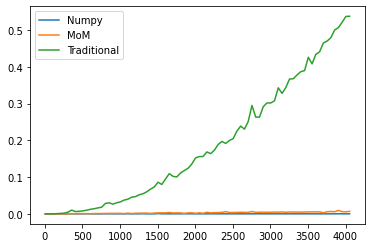

In [86]:
plt.plot(size, time_np, label = "Numpy")
plt.plot(size, time_mom, label = "MoM")
plt.plot(size, time_list, label = "Traditional")
plt.legend()
plt.show()

# Question 4


What is the gradient of the following function with respect to x and y?

$  \Rightarrow  x^{2} y +  y^{3}  sin \big(x\big)     $


We have given a function of two variables x and y as follows:   
$f \big(x,y\big)   =  x^{2}y+y^{3}sin \big(x\big) $

To find the gradient of the function we will use following formula:  

$ Grad \big(f \big(x,y\big) \big) = \frac{\partial f}{\partial x} i +  \frac{\partial f}{\partial y} j $




> $ \Rightarrow Grad \big(f \big(x,y\big) \big) = \frac{\partial   \big( x^{2}y+y^{3}sin \big(x\big)\big) }{\partial x} i + \frac{\partial   \big( x^{2}y+y^{3}sin \big(x\big)\big) }{\partial y} j $  

Since `y` is considered as costant for partial derivative with respect to the `x`, and likewise `x` is considered a constant for partial derivative with respect to `y`.

> $\Rightarrow Grad \big(f \big(x,y\big) \big) = \big( 2 x y  +  y^{3}cos \big(x\big) \big) i +  \big(x^{2}+ 3 y^{2}sin \big(x\big) \big)  j $


# Question 5

Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [32]:
import jax.numpy as jnp
import jax

In [33]:
df_dxy = jax.grad(lambda x,y:  (x ** 2)*y + (y**3)*jnp.sin(x), argnums=(0, 1))
df_dx = jax.grad(lambda x,y:  (x ** 2)*y + (y**3)*jnp.sin(x), argnums=0)
df_dy = jax.grad(lambda x,y:  (x ** 2)*y + (y**3)*jnp.sin(x), argnums=1)

Some sample examples:

In [37]:
data = jnp.array([[1.0, 2.0, 3.0, 2.9],[1.0, 2.0, 3.0, 2.5] ], float)
data[:,0]

DeviceArray(1., dtype=float32)

In [68]:
for pair in range(data.shape[1]):
  print(data[:,pair], end=": ")
  print(df_dxy(data[:,pair][0], data[:,pair][1]))

[1. 1.]: (DeviceArray(2.5403023, dtype=float32), DeviceArray(3.5244129, dtype=float32))
[2. 2.]: (DeviceArray(4.670825, dtype=float32), DeviceArray(14.911569, dtype=float32))
[3. 3.]: (DeviceArray(-8.729797, dtype=float32), DeviceArray(12.81024, dtype=float32))
[2.9 2.5]: (DeviceArray(-0.67122173, dtype=float32), DeviceArray(12.895924, dtype=float32))


In [67]:
for pair in range(data.shape[1]):
  print(data[:,pair], end = ": ")
  print(df_dx(data[:,pair][0], data[:,pair][1]))

[1. 1.]: 2.5403023
[2. 2.]: 4.670825
[3. 3.]: -8.729797
[2.9 2.5]: -0.67122173


In [65]:
for pair in range(data.shape[1]):
  print(data[:,pair], end=': ')
  print(df_dy(data[:,pair][0], data[:,pair][1]))

[1. 1.]: 3.5244129
[2. 2.]: 14.911569
[3. 3.]: 12.81024
[2.9 2.5]: 12.895924


# Question 6

Use sympy to confirm that you obtain the same gradient analytically.

In [53]:
from sympy import *
x,y =symbols('x, y')
# y=symbols('y')

In [56]:

ans1 = diff( ((x**2)*y) + ((y**3)*sin(x)), x) 
ans2 = diff( ((x**2)*y) + ((y**3)*sin(x)), y)

print(ans1)
print(ans2)

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


** Let us verify with some examples **

In [75]:
ans1.evalf(subs={ x: 1.0, y: 1.0})

2.54030230586814

In [76]:
ans2.evalf(subs={x:1.0, y:1.0})

3.52441295442369

# Question 7: 

Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

In [77]:
import random
import string

def generate_random_names(count):
  names = []
  for _ in range(count):
    res = ''.join(random.choices(string.ascii_lowercase , k=random.randint(4,6)))
    names.append(res)
  return names

# generate_names(5)


def generate_random_marks(subjects,students):
  for rol in students.keys():
    students[rol]['MARKS'] = dict([(name, random.randint(5,10)) for name in subjects])
  return students


def create_students_dict(rollnum, subject, names):
  students = dict()
  for i in range(len(rollnum)):
    students[rollnum[i]] = {'ROLLNUM':rollnum[i], "NAME":names[i], "MARKS": None}
  return generate_random_marks(subjects,students)

# subjects = ['Maths', 'English', 'Hindi']
# rollnum = [i+1 for i in range(5)]
# names = generate_random_names(5)
# create_students_dict(rollnum, subjects, names)


In [78]:



details = dict()

years = [2022, 2023, 2024, 2025]
batch = ['Branch1','Branch2', 'Branch3']

# Creating a list of subjects 
subjects = ['Maths', 'English', 'Hindi']

for yr in years:
  details[yr] = dict()

for yr in details.keys():
  for bt in batch:
    details[yr][bt] = dict()

for yr in details.keys():
  for bt in batch:
    rollnum = [i+1 for i in range(5)]
    names = generate_random_names(5)
    details[yr][bt] = create_students_dict(rollnum, subjects, names)



details



{2022: {'Branch1': {1: {'ROLLNUM': 1,
    'NAME': 'pnjm',
    'MARKS': {'Maths': 6, 'English': 6, 'Hindi': 9}},
   2: {'ROLLNUM': 2,
    'NAME': 'oshz',
    'MARKS': {'Maths': 10, 'English': 10, 'Hindi': 5}},
   3: {'ROLLNUM': 3,
    'NAME': 'ftzx',
    'MARKS': {'Maths': 9, 'English': 6, 'Hindi': 6}},
   4: {'ROLLNUM': 4,
    'NAME': 'huwaql',
    'MARKS': {'Maths': 9, 'English': 8, 'Hindi': 8}},
   5: {'ROLLNUM': 5,
    'NAME': 'osuu',
    'MARKS': {'Maths': 6, 'English': 8, 'Hindi': 8}}},
  'Branch2': {1: {'ROLLNUM': 1,
    'NAME': 'tckng',
    'MARKS': {'Maths': 10, 'English': 8, 'Hindi': 10}},
   2: {'ROLLNUM': 2,
    'NAME': 'vtsitv',
    'MARKS': {'Maths': 9, 'English': 5, 'Hindi': 10}},
   3: {'ROLLNUM': 3,
    'NAME': 'fefw',
    'MARKS': {'Maths': 8, 'English': 7, 'Hindi': 9}},
   4: {'ROLLNUM': 4,
    'NAME': 'iizp',
    'MARKS': {'Maths': 7, 'English': 5, 'Hindi': 10}},
   5: {'ROLLNUM': 5,
    'NAME': 'avslcw',
    'MARKS': {'Maths': 7, 'English': 7, 'Hindi': 8}}},
  'Bran

# Question 8

In [85]:
import random

class Student:
  def __init__(self, roll, name):
    self.roll = roll
    self.name = name
    self.Marks = dict()

  # This function will initialize the marks dictionary for the student 
  # with the given list of subjects
  def defineMarks(self, subjects):
    for sub in subjects:
      self.Marks[sub] = random.randint(5,10)

  # Some getters and setters
  def getName(self):
    return self.name
  def getRoll(self):
    return self.roll
  def getMarks(self):
    return self.Marks
  def getSubjectMarks(self, subject):
    return self.Marks[subject]
  def setName(self, newName):
    self.name = newName
  def setSubjectMarks(self, subject, newMark):
    self.Marks[subject] = newMark




class Branch:
  def __init__(self, branchName):
    self.branchName = branchName
    self.listOfStudents = list()

  # Add a student object to the list of students
  def admit_student(self,student):
    self.listOfStudents.append(student)
  
  def getRollNumbers(self):
    return [sObj.getRoll() for sObj in self.listOfStudents]
  def getName(self):
    return [(sObj.getRoll(), sObj.getName()) for sObj in self.listOfStudents]

  # def updateStudent(self,roll,name = None, marks = None):
  #   for sObj in self.listOfStudents:
  #     if sObj.getRoll() == student.getRoll():
  #       sObj.setName(newStudent.setName())
  #       sObj.

class Year:
  def __init__(self,yearNumber):
    self.yearNum = yearNumber
    self.branches = list()

  def add_branch(self, branch):
    self.branches.append(branch)



subjects = ['Maths', 'English', 'Science']
rollnum = [i+1 for i in range(5)]
names = generate_random_names(5)

yearList = list()
for yr in range(2022, 2026):
  year = Year(yr)

  for br in range(1,3):
    # rollnum = [i+1 for i in range(5)]
    branch = Branch('Branch'+str(br))

    names = generate_random_names(5)
    for rol in range(1,6):
      student = Student(rol, names[rol-1])
      student.defineMarks(subjects)
      branch.admit_student(student)
    
    year.add_branch(branch)

  yearList.append(year)




In [86]:
year_no = 2022
branch_no = 0
roll_no = 0
print(yearList[2022-year_no].branches[branch_no].listOfStudents[roll_no].getName())
print(yearList[2022-year_no].branches[branch_no].listOfStudents[roll_no].getRoll())
print(yearList[2022-year_no].branches[branch_no].listOfStudents[roll_no].getMarks())



arkcxs
1
{'Maths': 8, 'English': 7, 'Science': 7}


# Question 9:

Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.



In [21]:
x = np.arange(0.5, 100, 0.5)
x

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. ,
       11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. , 16.5,
       17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5, 22. ,
       22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. , 27.5,
       28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5, 33. ,
       33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. , 38.5,
       39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5, 44. ,
       44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. , 49.5,
       50. , 50.5, 51. , 51.5, 52. , 52.5, 53. , 53.5, 54. , 54.5, 55. ,
       55.5, 56. , 56.5, 57. , 57.5, 58. , 58.5, 59. , 59.5, 60. , 60.5,
       61. , 61.5, 62. , 62.5, 63. , 63.5, 64. , 64.5, 65. , 65.5, 66. ,
       66.5, 67. , 67.5, 68. , 68.5, 69. , 69.5, 70. , 70.5, 71. , 71.5,
       72. , 72.5, 73. , 73.5, 74. , 74.5, 75. , 75

## y =x

In [22]:
y1 = x.copy()

import matplotlib.pyplot as plt

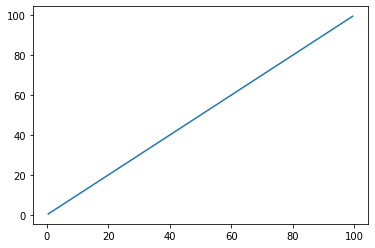

In [23]:
plt.plot(x,y1,label = 'plot of y = x')

## $ y = x^{2} $

In [24]:
y2 = np.square(x)
y2

array([2.50000e-01, 1.00000e+00, 2.25000e+00, 4.00000e+00, 6.25000e+00,
       9.00000e+00, 1.22500e+01, 1.60000e+01, 2.02500e+01, 2.50000e+01,
       3.02500e+01, 3.60000e+01, 4.22500e+01, 4.90000e+01, 5.62500e+01,
       6.40000e+01, 7.22500e+01, 8.10000e+01, 9.02500e+01, 1.00000e+02,
       1.10250e+02, 1.21000e+02, 1.32250e+02, 1.44000e+02, 1.56250e+02,
       1.69000e+02, 1.82250e+02, 1.96000e+02, 2.10250e+02, 2.25000e+02,
       2.40250e+02, 2.56000e+02, 2.72250e+02, 2.89000e+02, 3.06250e+02,
       3.24000e+02, 3.42250e+02, 3.61000e+02, 3.80250e+02, 4.00000e+02,
       4.20250e+02, 4.41000e+02, 4.62250e+02, 4.84000e+02, 5.06250e+02,
       5.29000e+02, 5.52250e+02, 5.76000e+02, 6.00250e+02, 6.25000e+02,
       6.50250e+02, 6.76000e+02, 7.02250e+02, 7.29000e+02, 7.56250e+02,
       7.84000e+02, 8.12250e+02, 8.41000e+02, 8.70250e+02, 9.00000e+02,
       9.30250e+02, 9.61000e+02, 9.92250e+02, 1.02400e+03, 1.05625e+03,
       1.08900e+03, 1.12225e+03, 1.15600e+03, 1.19025e+03, 1.225

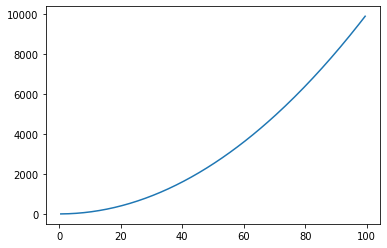

In [25]:
plt.plot(x,y2)

## $ y = x^{3} $

In [26]:
y3 = x**3
y3

array([1.25000000e-01, 1.00000000e+00, 3.37500000e+00, 8.00000000e+00,
       1.56250000e+01, 2.70000000e+01, 4.28750000e+01, 6.40000000e+01,
       9.11250000e+01, 1.25000000e+02, 1.66375000e+02, 2.16000000e+02,
       2.74625000e+02, 3.43000000e+02, 4.21875000e+02, 5.12000000e+02,
       6.14125000e+02, 7.29000000e+02, 8.57375000e+02, 1.00000000e+03,
       1.15762500e+03, 1.33100000e+03, 1.52087500e+03, 1.72800000e+03,
       1.95312500e+03, 2.19700000e+03, 2.46037500e+03, 2.74400000e+03,
       3.04862500e+03, 3.37500000e+03, 3.72387500e+03, 4.09600000e+03,
       4.49212500e+03, 4.91300000e+03, 5.35937500e+03, 5.83200000e+03,
       6.33162500e+03, 6.85900000e+03, 7.41487500e+03, 8.00000000e+03,
       8.61512500e+03, 9.26100000e+03, 9.93837500e+03, 1.06480000e+04,
       1.13906250e+04, 1.21670000e+04, 1.29778750e+04, 1.38240000e+04,
       1.47061250e+04, 1.56250000e+04, 1.65813750e+04, 1.75760000e+04,
       1.86096250e+04, 1.96830000e+04, 2.07968750e+04, 2.19520000e+04,
      

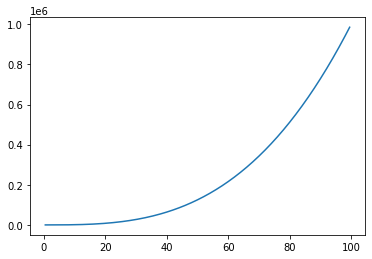

In [27]:
plt.plot(x,y3)

## $ y = x^{3} / 100 $

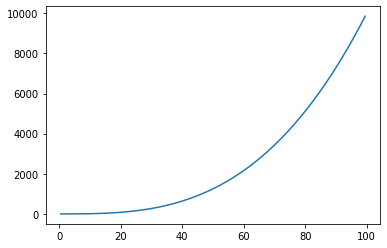

In [28]:
y4 = (x**3)/100
plt.plot(x,y4)

## y = sin(x)

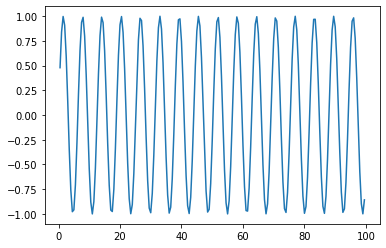

In [29]:
y5 = np.sin(x)

plt.plot(x,y5)

## y = sin(x)/x

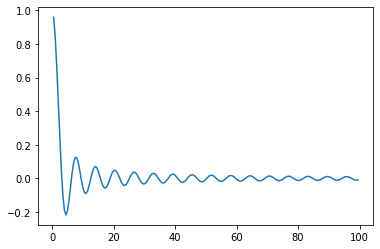

In [30]:
y6 = (np.sin(x))/x
plt.plot(x,y6)

## y = log(x)

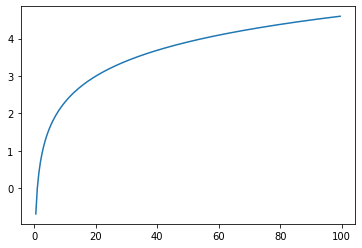

In [31]:
y7 = np.log(x)
plt.plot(x,y7)

## y = exp(x)

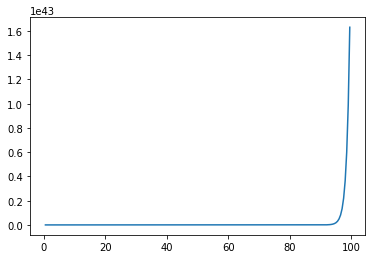

In [32]:
y8 = np.exp(x)
plt.plot(x,y8)

## Summary of all the plots

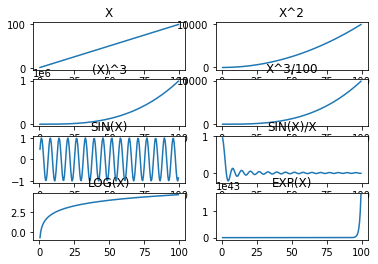

In [34]:
import matplotlib.pyplot as plt
plt.subplot(4,2,1)
plt.plot(x,y1)
plt.title('X')

plt.subplot(4,2,2)
plt.plot(x,y2)
plt.title('X^2')

plt.subplot(4,2,3)
plt.plot(x,y3)
plt.title('(X)^3')

plt.subplot(4,2,4)
plt.plot(x,y4)
plt.title('X^3/100')

plt.subplot(4,2,5)
plt.plot(x,y5)
plt.title('SIN(X)')

plt.subplot(4,2,6)
plt.plot(x,y6)
plt.title('SIN(X)/X')

plt.subplot(4,2,7)
plt.plot(x,y7)
plt.title('LOG(X)')

plt.subplot(4,2,8)
plt.plot(x,y8)
plt.title('EXP(X)')

plt.show()

# Question 10:

Using numpy generate a matrix of size 20X5 containing random numbers drawn 

uniformly from the range of 1 to 2. 

Using Pandas create a dataframe out of this matrix. 

Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. 

Find the column with the highest standard deviation. 

Find the row with the lowest mean

In [104]:
mat = np.random.uniform(1,2,(20,5))
mat

array([[1.38059917, 1.1386836 , 1.74183977, 1.36642115, 1.33936957],
       [1.33009924, 1.86017587, 1.46991625, 1.66301806, 1.33885238],
       [1.8174956 , 1.92564669, 1.77519864, 1.33145881, 1.97158763],
       [1.99753474, 1.76883492, 1.00477295, 1.29151587, 1.0703994 ],
       [1.39464826, 1.35694647, 1.39934695, 1.87142699, 1.24313327],
       [1.06998495, 1.12837786, 1.05660131, 1.09222561, 1.08962282],
       [1.84229727, 1.14593134, 1.85244498, 1.3100663 , 1.10702633],
       [1.93817198, 1.74552963, 1.45939248, 1.32389321, 1.09668759],
       [1.99510572, 1.69269522, 1.90544259, 1.11287439, 1.70461055],
       [1.65339179, 1.23423875, 1.95614274, 1.45233765, 1.50879047],
       [1.35096647, 1.0450056 , 1.98459654, 1.23068747, 1.21757198],
       [1.38107704, 1.37140953, 1.52939805, 1.55051617, 1.74692796],
       [1.98611588, 1.14368584, 1.14782826, 1.45026719, 1.1509864 ],
       [1.56856684, 1.82707567, 1.43399416, 1.94592911, 1.21615051],
       [1.8070952 , 1.78636337, 1.

In [106]:
import pandas as pd

col_names = ['A', 'B', 'C', 'D', 'E']

dataframe = pd.DataFrame(mat,columns = col_names)
dataframe

,A,B,C,D,E
0,1.380599,1.138684,1.741840,1.366421,1.339370
1,1.330099,1.860176,1.469916,1.663018,1.338852
2,1.817496,1.925647,1.775199,1.331459,1.971588
3,1.997535,1.768835,1.004773,1.291516,1.070399
4,1.394648,1.356946,1.399347,1.871427,1.243133
5,1.069985,1.128378,1.056601,1.092226,1.089623
6,1.842297,1.145931,1.852445,1.310066,1.107026
7,1.938172,1.745530,1.459392,1.323893,1.096688
8,1.995106,1.692695,1.905443,1.112874,1.704611
9,1.653392,1.234239,1.956143,1.452338,1.508790


In [114]:
# finding column with max standard deviation 

std = dataframe.std(axis = 0)
print(std)
data = dict(std)

key_max = max(zip(data.values(), data.keys()))[1]  
print("Column with highest STD. DEVIATION:", key_max)


A    0.324068
B    0.339258
C    0.322869
D    0.286914
E    0.293421
dtype: float64
Column with highest STD. DEVIATION: B


In [116]:
# finding column with lowest mean

mean = dataframe.mean(axis = 0)
print(mean)
data = dict(mean)

key_max = min(zip(data.values(), data.keys()))[1]  
print("Column with lowest MEAN:", key_max)

A    1.581779
B    1.470990
C    1.544051
D    1.493878
E    1.368469
dtype: float64
Column with lowest MEAN: E


# Question 11

Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.



In [117]:
dataframe['f'] = dataframe.sum(axis = 1)
dataframe

,A,B,C,D,E,f
0,1.380599,1.138684,1.741840,1.366421,1.339370,6.966913
1,1.330099,1.860176,1.469916,1.663018,1.338852,7.662062
2,1.817496,1.925647,1.775199,1.331459,1.971588,8.821387
3,1.997535,1.768835,1.004773,1.291516,1.070399,7.133058
4,1.394648,1.356946,1.399347,1.871427,1.243133,7.265502
5,1.069985,1.128378,1.056601,1.092226,1.089623,5.436813
6,1.842297,1.145931,1.852445,1.310066,1.107026,7.257766
7,1.938172,1.745530,1.459392,1.323893,1.096688,7.563675
8,1.995106,1.692695,1.905443,1.112874,1.704611,8.410728
9,1.653392,1.234239,1.956143,1.452338,1.508790,7.804901


In [118]:
dataframe['g']=dataframe.apply(lambda row:'LT8' if row.f <8 else 'GT8',axis=1)
dataframe

,A,B,C,D,E,f,g
0,1.380599,1.138684,1.741840,1.366421,1.339370,6.966913,LT8
1,1.330099,1.860176,1.469916,1.663018,1.338852,7.662062,LT8
2,1.817496,1.925647,1.775199,1.331459,1.971588,8.821387,GT8
3,1.997535,1.768835,1.004773,1.291516,1.070399,7.133058,LT8
4,1.394648,1.356946,1.399347,1.871427,1.243133,7.265502,LT8
5,1.069985,1.128378,1.056601,1.092226,1.089623,5.436813,LT8
6,1.842297,1.145931,1.852445,1.310066,1.107026,7.257766,LT8
7,1.938172,1.745530,1.459392,1.323893,1.096688,7.563675,LT8
8,1.995106,1.692695,1.905443,1.112874,1.704611,8.410728,GT8
9,1.653392,1.234239,1.956143,1.452338,1.508790,7.804901,LT8


In [119]:
#  Find the number of rows in the dataframe where the value in the column “g” is “LT8”.

dataframe['g'].value_counts()['LT8']


17

In [120]:
# Find the standard deviation of the column “f” for the rows where the value in the
# column “g” is “LT8” and “GT8” respectively.
lessthan8=dataframe.apply(lambda row:row.f if row.f <8 else None,axis=1)
greaterthan8=dataframe.apply(lambda row:row.f if row.f >=8 else None,axis=1)
print("STD. Dev of less than 8: ",lessthan8.std())
print("STD. Dev of greater than 8: ",greaterthan8.std())



STD. Dev of less than 8:  0.58782818559864
STD. Dev of greater than 8:  0.2104965536906476


# Question 12

Write a small piece of code to explain broadcasting in numpy.

 Broadcasting provides a means of vectorizing array operations so that looping occurs in C instead of Python. 

> NOTE: cases where broadcasting is a bad idea because it leads to inefficient use of memory that slows computation.



In [128]:
arr = np.random.rand(3)
print(arr)
arr*4

[0.03514906 0.6848145  0.04224925]


array([0.14059626, 2.739258  , 0.16899699])

In above example the dimenstion of array are 1-D.\
And this array is then multiplied with 0-D element 

thus the multiplication is broadcasted over the array

> Two dimensions are compatible when

- they are equal, or

- one of them is 1.

In [123]:

arr1 = np.random.rand(3,1)
arr2 = np.random.rand(3)

print(arr1)
print(arr2)

[[0.80131353]
 [0.02907527]
 [0.07895003]]
[0.63107578 0.34394815 0.31891167]


In [124]:
arr1 + arr2

array([[1.43238931, 1.14526167, 1.1202252 ],
       [0.66015105, 0.37302341, 0.34798694],
       [0.71002581, 0.42289818, 0.3978617 ]])

In [129]:
arr1 = np.random.rand(3,2)
arr2 = np.random.rand(3,1)

print(arr1)
print(arr2)

arr1 + arr2

[[0.46478456 0.24328423]
 [0.48509661 0.18143762]
 [0.48084018 0.68410407]]
[[0.61107227]
 [0.24201863]
 [0.99118702]]


array([[1.07585684, 0.8543565 ],
       [0.72711524, 0.42345625],
       [1.47202721, 1.67529109]])

# Question 13

```
numpy.argmin(a, axis=None, out=None, *, keepdims=<no value>)
```
> Returns the indices of the minimum values along an axis.

> Parameters:
* `a` : array_like - Input array.
* `axisint`, optional, By default, the index is into the flattened array, otherwise along the specified axis.
* `outarray`, optional
If provided, the result will be inserted into this array. It should be of the appropriate shape and dtype.
* `keepdimsbool`, optional
If this is set to True, the axes which are reduced are left in the result as dimensions with size one. With this option, the result will broadcast correctly against the array.

> Returns:
`index_arrayndarray of ints` :   
Array of indices into the array. It has the same shape as a.shape with the dimension along axis removed. If keepdims is set to True, then the size of axis will be 1 with the resulting array having same shape as a.shape.

In [ ]:
import numpy as np


In [ ]:
array = np.random.rand(4,3,2)

In [ ]:
array

array([[[0.55180611, 0.65894246],
        [0.9999544 , 0.67756872],
        [0.36085683, 0.57342065]],

       [[0.88265305, 0.07596755],
        [0.15677069, 0.94567099],
        [0.16430712, 0.49648281]],

       [[0.42058488, 0.75694255],
        [0.75265524, 0.6237761 ],
        [0.15845625, 0.94593389]],

       [[0.33198398, 0.50578581],
        [0.32888747, 0.84232992],
        [0.5696524 , 0.07986408]]])

In [ ]:
np.argmin(array)

7

In [ ]:
np.argmin(array, axis = 0)

array([[3, 1],
       [1, 2],
       [2, 3]])

In [ ]:
np.argmin(array, axis = 1)

array([[2, 2],
       [1, 0],
       [2, 1],
       [1, 2]])

In [ ]:
array2 = np.random.rand(3,2)
print(array2)
np.argmin(array2)

[[0.05354443 0.27423982]
 [0.31123175 0.45767917]
 [0.32379077 0.89646065]]


0

In [ ]:
np.argmin(array2, axis = 0)

array([1, 1])

In [ ]:
np.argmin(array2, axis = 1)

array([0, 0, 0])

In [11]:
def argmin(array, axis = None, out  = None ):
  if axis == None:
    ans = 0
    flat = np.ravel(array)
    minn = flat[0]
    for i in range(1,len(flat)):
      if flat[i] < minn:
        minn = flat[i]
        ans = i
      if out == None:
        return ans
      else:
        out = ans
    
  elif axis == 1: # row wise
    ans = []
    for sub_array in array:
      # flat = np.ravel(array)
      # ans.append(0)
      # minn = flat[0]

      # for i in range(1,len(flat)):
      #   if flat[i] < minn:
      #     minn = flat[i]
      #     ans[-1] = i
      # if out == None:
      #   return ans
      # else:
      #   out = ans
      if sub_array.ndim

  else:
    return None



# Ravel is faster than flatten() as it does not occupy any memory.
#	Flatten() is comparatively slower than ravel() as it occupies memory.

In [ ]:
argmin(array)

0.32823336796947544

AttributeError: ignored

In [ ]:
np.source(np.argmin)

TypeError: ignored

In [1]:
lst = [
    [[3,8,6,44],[4,50,70,5],[85,65,95,8]],
    [[71,1,7,21],[2,8,12,22],[16,1,18,15]]
]

In [2]:
import numpy as np



In [10]:
arr = np.array(lst)
arr

array([[[ 3,  8,  6, 44],
        [ 4, 50, 70,  5],
        [85, 65, 95,  8]],

       [[71,  1,  7, 21],
        [ 2,  8, 12, 22],
        [16,  1, 18, 15]]])

In [11]:
np.argmin(arr, axis = 0)   # col

array([[0, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 0]])

In [12]:
np.argmin(arr, axis=1)

array([[0, 0, 0, 1],
       [1, 0, 0, 2]])

In [13]:
arr2 = np.array([[22,21],[1,2]])
np.argmin(arr2, axis = 1)

array([1, 0])

In [ ]:
def argmin(arr, axis = None):
    if axis == None:
        pass
    else:
        if arr.ndim > 2:
            ans = []
            if axis == 1:
                # for00000 col in range(len(arr[0][0])):   # range(arr.shape[2])
                    #  ans.append(argmin(arr))
                for row in range(len(arr)):
                    ans.append(argmin(arr[row], axis^1))
                return ans
            else:
                for col in range(len(arr[])):
                    # ans.append(argmin(arr[]))

In [15]:
arr

array([[[ 3,  8,  6, 44],
        [ 4, 50, 70,  5],
        [85, 65, 95,  8]],

       [[71,  1,  7, 21],
        [ 2,  8, 12, 22],
        [16,  1, 18, 15]]])

In [29]:
ansFinal = []
for i in range(arr.shape[0]):
  ans = []
  for k in range(arr.shape[2]):
    print(arr[i,:,k])
    min_value = arr[i,0,k]
    min_idx = 0
    for j in range(arr.shape[1]):
      if min_value > arr[i,j,k] :
        min_value = arr[i,j,k]
        min_idx = j
      
    ans.append(min_idx)
  ansFinal.append(ans)
print(ansFinal)

[ 3  4 85]
[ 8 50 65]
[ 6 70 95]
[44  5  8]
[71  2 16]
[1 8 1]
[ 7 12 18]
[21 22 15]
[[0, 0, 0, 1], [1, 0, 0, 2]]


In [21]:
np.argmin(arr,axis = 1)

array([[0, 0, 0, 1],
       [1, 0, 0, 2]])

In [24]:
arr[:,0]

array([[ 3,  8,  6, 44],
       [71,  1,  7, 21]])

In [25]:
arr.shape

(2, 3, 4)

In [2]:
import numpy as np
